<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Sales Forecasting

### Part 4 Evaluation and Conclusion

---


## Contents:
- [Compare Different Models on SMAPE Loss](#Compare-Different-Models-on-SMAPE-Loss)
- [Conclusion](#Conclusion)
- [Limitations and recommendations](#Limitations-and-Recommendations)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import simplefilter
simplefilter("ignore", FutureWarning)
%matplotlib inline

In [3]:
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.compose import (
    EnsembleForecaster,
    ReducedForecaster,
    TransformedTargetForecaster,
)
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.theta import ThetaForecaster
from sktime.performance_metrics.forecasting import sMAPE, smape_loss
from sktime.utils.plotting import plot_series
from sktime.forecasting.fbprophet import Prophet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Compare Different Models on SMAPE Loss

In [13]:
result=pd.read_csv('../Dataset/results.csv')
result= result.drop(columns= "Unnamed: 0")
result.head()

,model,smape_loss
0,prophet,0.031872
1,lgbm,0.057895
2,r_forest,0.058013
3,ensemble,0.063478
4,xgb,0.067767


### Models vs SMAPE Loss

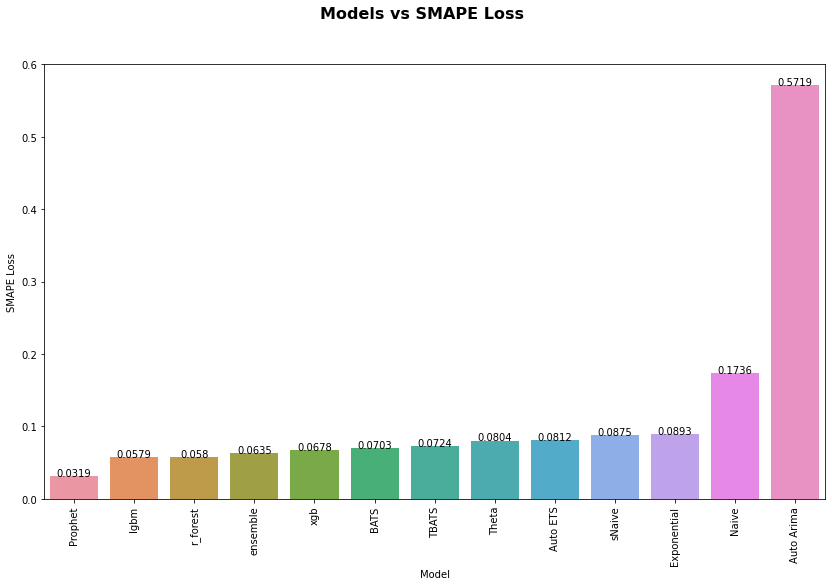

In [14]:
#Plot Model vs SAMPE Loss
fig_dims = (14, 8)
fig, ax = plt.subplots(figsize=fig_dims)
fig.suptitle('Models vs SMAPE Loss', fontsize = 16, weight = 'bold')

ax=sns.barplot(x = 'model', y = 'smape_loss', data=result);
ax.set_xlabel('Model')
ax.set_ylabel('SMAPE Loss')
ax.set_xticklabels(['Prophet','lgbm','r_forest','ensemble','xgb','BATS','TBATS','Theta','Auto ETS',
                    'sNaive','Exponential' ,'Naive' ,'Auto Arima'], rotation='vertical', fontsize=10)
for index, row in result.iterrows():
    ax.text(row.name,row.smape_loss, round(row.smape_loss,4), color='black', ha="center")
plt.show()

In [12]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "SMAPE Score"]

x.add_row(["Prophet", 0.031872])
x.add_row(["Light Gradient Boost", 0.057895])
x.add_row(["RandomForest", 0.058013])
x.add_row(["Ensemble", 0.063478])
x.add_row(["XGBoost", 0.067767])
x.add_row(["BATS", 0.070344])
x.add_row(["TBATS", 0.072434])
x.add_row(["Theta", 0.080372])
x.add_row(["Auto ETS", 0.081176])
x.add_row(["Seasonal Naive", 0.087535])
x.add_row(["Exponential Smoothing", 0.089310])
x.add_row(["Naive Approach", 0.173581])
x.add_row(["Auto ARIMA", 0.571929])
print(x)

+-----------------------+-------------+
|         Model         | SMAPE Score |
+-----------------------+-------------+
|        Prophet        |   0.031872  |
|  Light Gradient Boost |   0.057895  |
|      RandomForest     |   0.058013  |
|        Ensemble       |   0.063478  |
|        XGBoost        |   0.067767  |
|          BATS         |   0.070344  |
|         TBATS         |   0.072434  |
|         Theta         |   0.080372  |
|        Auto ETS       |   0.081176  |
|     Seasonal Naive    |   0.087535  |
| Exponential Smoothing |   0.08931   |
|     Naive Approach    |   0.173581  |
|       Auto ARIMA      |   0.571929  |
+-----------------------+-------------+


Observations:<br>
    Prophet performed best on the given data with SMAPE loss of 0.031872. <br>
    Auto ARIMA is the worst perfomed model with a SMAPE loss of 0.571929 followed by Naive Approach with SMAPE loss of 0.173581.<br>
    All the rest of the models performed in between those.

## Conclusion

This project predicts the aggregated total number of sales in the USA-based Walmart store for the next 28 days time period. Prediction is made based on historical sales data for 5 years. A number of statistical forecasting algorithms are used for the prediction and and a number of models are compared based on the SMAPE loss score it has. Various algorithms from SKtime library is considered instead of the traditional forecasting algorithms and it is found that the SKtime models are very easy to use for prediction. Various models that are used are below:<br>

1) Naive Approach<br>
2) Seasonal Naive<br>
3) Exponential Smoothing<br>
4) Auto ETS<br>
5) Auto ARIMA<br>
6) BATS<br>
7) TBATS<br>
8) ThetaForecaster<br>
9) RandomForest<br>
10) Prophet<br>
11) XGboost<br>
12) Light Gradient Boost<br>
13) Ensemble


SAMPE losses of each of the above models are calculated. Low SMAPE loss score has better accuracy and the models are compared based on thir SMAPE loss score. Among all the models, prophet performed best on the given data with the SMAPE loss of 0.031872. Auto ARIMA performed worse among the other models with a loss of 0.571929. 

A sales forecast helps every business make better business decisions. It helps in overall business planning, budgeting, and risk management. Sales forecasting allows companies to efficiently allocate resources for future growth and manage its cash flow. Thus an accurate sales forecasting is very important for every business to suceed.